In [1]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
#This is used if you're running the model in google colab and the model weights and images are saved on your drive
# If you want to run the code somewhere else, you should modify the code

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Helper Functions

In [3]:
def extract_patches(image, patch_size=(40, 40, 3), stride=(40, 40)):
    """
    - Splits image into patches of size 40x40
    - Required to use RIDNET model
    """
    patches = []
    height, width, _ = image.shape
    patch_height, patch_width, _ = patch_size
    stride_height, stride_width = stride

    for y in range(0, height - patch_height + 1, stride_height):
        for x in range(0, width - patch_width + 1, stride_width):
            patch = image[y:y+patch_height, x:x+patch_width]
            patches.append(patch)

    return np.array(patches)

def reconstruct_image(patches, original_image_shape, stride=(40, 40)):
    """
    - Reconstructs image from 40x40 patch given desired image shape
    """
    height, width, channels = original_image_shape
    patch_height, patch_width, _ = patches[0].shape
    stride_height, stride_width = stride
    reconstructed_image = np.zeros((height, width, channels))
    patch_counts = np.zeros((height, width, channels))

    index = 0
    for y in range(0, height - patch_height + 1, stride_height):
        for x in range(0, width - patch_width + 1, stride_width):
            reconstructed_image[y:y+patch_height, x:x+patch_width] += patches[index]
            patch_counts[y:y+patch_height, x:x+patch_width] += 1
            index += 1

    return reconstructed_image / patch_counts

def get_image(model, noisy_image):

    # Take an image and turn it into a list of 40x40 patches
    patches = extract_patches(noisy_image)

    # Run model on each patch to get a new list of 40x40 output patches
    output = [model.predict(np.expand_dims(i, axis=0), verbose=0)[0] for i in patches]

    # Create full output by combining each 40x40 output
    reconstructed_output = reconstruct_image(output, noisy_image.shape)

    # Taking the mean (to make image monochrome) and making NaN values white makes image look better
    fixed_image = np.mean(reconstructed_output, axis=2)
    fixed_image[np.isnan(fixed_image)] = 255

    return fixed_image

## Load Model

In [4]:

model_path = '/content/drive/My Drive/6.8301 Final Project/RIDNET Model/model1.h5' # Change to folder that models are in
# Model 1 (trained on images w/ only noise) is "model1.h5"
# Model 2 (trained on images w/ noise + blur) is "model2.h5"

loaded_model = load_model(model_path)

## Get Images

In [9]:
image_folder = '/content/drive/My Drive/6.8301 Final Project/Images Denoised Algorithmically/' # Change folder to folder w/ images to run code on

images = [plt.imread(image_folder + filename) for filename in sorted(os.listdir(image_folder))]
print(len(images))
print(type(images[0]))
names = sorted(os.listdir(image_folder))


17
<class 'numpy.ndarray'>


In [10]:
rgb_images = []
for image in images:
  arr_3d = image[:, :, np.newaxis]  # Add a new axis to make it WxHx1
  arr_3d = np.repeat(arr_3d, 3, axis=2)
  rgb_images.append(arr_3d)

images = rgb_images


## Run model on image

In [7]:
input = images[0]
denoised_image = get_image(loaded_model, input)

KeyboardInterrupt: 

## Plot Image

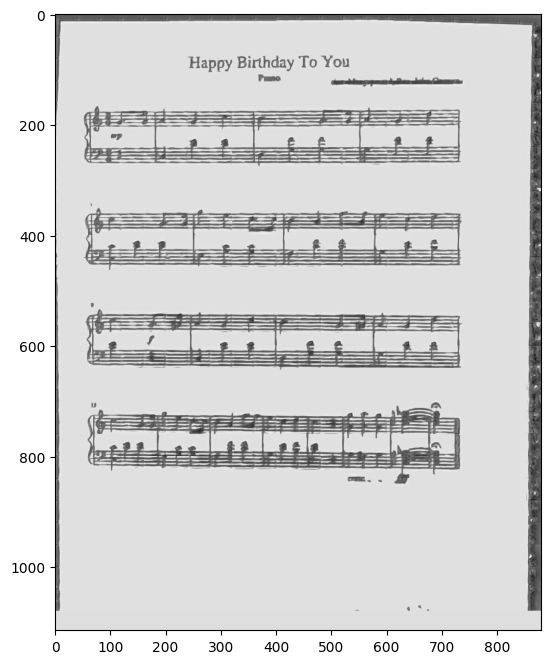

In [22]:

plt.figure(figsize=(12, 8))
plt.imshow(denoised_image, cmap='gist_gray')

## Save Image


In [23]:
pil_image = Image.fromarray(denoised_image)
pil_image = pil_image.convert('RGB')
save_folder = '/content/drive/My Drive/6.8301 Final Project/Images Denoised Algorithmically and with RIDNet/'
file_path = f'{names[0].split(".")[0]}_ridnet.jpg'; # Change to the name of the file you want to save
pil_image.save(os.path.join(save_folder, file_path))

In [11]:
for i in range(1, len(images)):
  print("Denoising Image", i)
  input = images[i]
  denoised_image = get_image(loaded_model, input)

  pil_image = Image.fromarray(denoised_image)
  pil_image = pil_image.convert('RGB')
  save_folder = '/content/drive/My Drive/6.8301 Final Project/Images Denoised Algorithmically and with RIDNet/'
  file_path = f'{names[i].split(".")[0]}_ridnet.jpg'; # Change to the name of the file you want to save
  pil_image.save(os.path.join(save_folder, file_path))

Denoising Image 1


<ipython-input-3-edd92d4fa36b>:35: RuntimeWarning: invalid value encountered in divide
  return reconstructed_image / patch_counts


Denoising Image 2
Denoising Image 3
Denoising Image 4
Denoising Image 5
Denoising Image 6
Denoising Image 7
Denoising Image 8
Denoising Image 9
Denoising Image 10
Denoising Image 11
Denoising Image 12
Denoising Image 13
Denoising Image 14
Denoising Image 15
Denoising Image 16
